In [92]:
import cv2
import numpy as np
import pytesseract
import os
import matplotlib.pyplot as plt

In [93]:
os.chdir('C:\\Users\\Tanmay.Pal\\Downloads\\Table_Data_Extraction-main')

In [60]:
#!pip install imutils


In [61]:
img=cv2.imread('img1.jpg')
img = img[1659:3305,231:4816]
cv2.imwrite('cropped_img1.jpg',img)

True

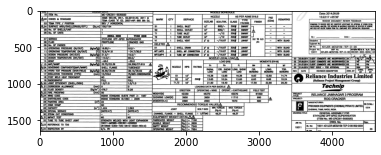

In [150]:
import cv2
import matplotlib.pyplot as plt
file=r'cropped_img1.jpg'
img = cv2.imread(file,0)
kernel=np.ones((3,3),np.uint8)
img=cv2.erode(img,kernel)
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

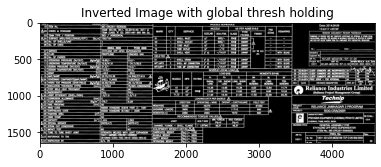

In [151]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

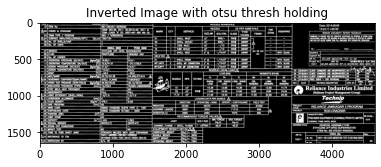

In [152]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

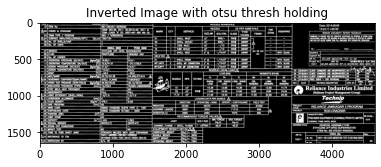

In [153]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [154]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
print(kernel)

[[1 1]
 [1 1]]


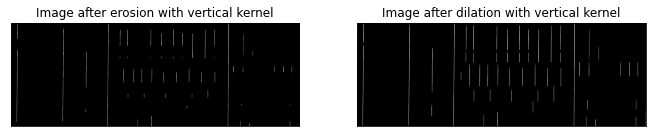

In [155]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

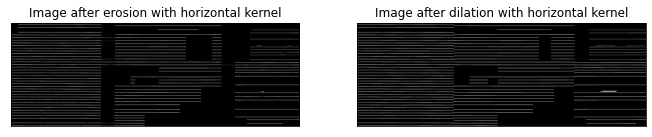

In [156]:

plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()


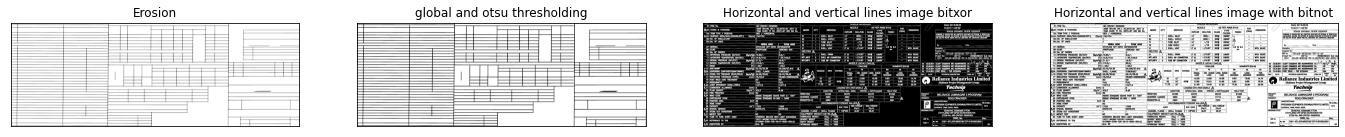

In [157]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [158]:

contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [159]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

In [160]:
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
  
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [129]:
contours

(array([[[3456,    0]],
 
        [[3456,  192]],
 
        [[3455,  193]],
 
        [[3455,  308]],
 
        [[3454,  309]],
 
        [[3454,  344]],
 
        [[3453,  345]],
 
        [[3453,  640]],
 
        [[3533,  640]],
 
        [[3534,  639]],
 
        [[3537,  639]],
 
        [[3538,  640]],
 
        [[3680,  640]],
 
        [[3681,  639]],
 
        [[3684,  639]],
 
        [[3685,  640]],
 
        [[4145,  640]],
 
        [[4146,  641]],
 
        [[4146,  644]],
 
        [[4145,  645]],
 
        [[3685,  645]],
 
        [[3685,  680]],
 
        [[3690,  680]],
 
        [[3691,  681]],
 
        [[3691,  684]],
 
        [[3690,  685]],
 
        [[3685,  685]],
 
        [[3685,  720]],
 
        [[3728,  720]],
 
        [[3729,  721]],
 
        [[3729,  724]],
 
        [[3728,  725]],
 
        [[3685,  725]],
 
        [[3685,  760]],
 
        [[3802,  760]],
 
        [[3803,  761]],
 
        [[3803,  764]],
 
        [[3802,  765]],
 
        [[36

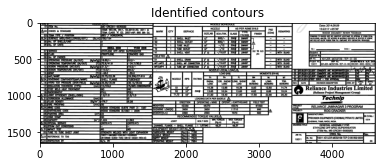

In [161]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        #cv2.imshow('image',image)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [162]:
boxes

[[10, 0, 93, 40],
 [0, 0, 1, 170],
 [112, 47, 721, 36],
 [10, 47, 93, 35],
 [840, 48, 703, 36],
 [3239, 63, 209, 133],
 [1738, 63, 109, 133],
 [1551, 63, 180, 133],
 [3087, 64, 144, 132],
 [2583, 64, 497, 54],
 [2226, 64, 349, 54],
 [1855, 64, 364, 133],
 [110, 90, 722, 72],
 [9, 90, 94, 71],
 [840, 91, 702, 72],
 [2891, 125, 188, 72],
 [2726, 125, 156, 72],
 [2583, 125, 135, 72],
 [2396, 125, 179, 72],
 [2226, 125, 162, 72],
 [3689, 129, 896, 43],
 [110, 168, 722, 36],
 [8, 168, 93, 34],
 [840, 169, 702, 35],
 [3689, 178, 896, 91],
 [1549, 203, 180, 41],
 [3239, 204, 208, 41],
 [3087, 204, 143, 41],
 [2887, 204, 191, 427],
 [2726, 204, 156, 41],
 [2583, 204, 135, 41],
 [2396, 204, 178, 41],
 [2226, 204, 162, 41],
 [1854, 204, 364, 41],
 [1738, 204, 108, 40],
 [110, 210, 722, 36],
 [8, 210, 93, 34],
 [839, 211, 703, 36],
 [3238, 252, 209, 41],
 [3087, 252, 143, 41],
 [2726, 252, 156, 41],
 [2582, 252, 135, 41],
 [2395, 252, 178, 41],
 [2225, 252, 162, 41],
 [1854, 252, 362, 41],
 [1737

In [163]:

rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if boxes[i][1]<=previous[1]+10:
        #print("boxessssssssssssssssssss",boxes)
       # print("previouuuuuuuuuuuuuuuuuuus",previous)
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])
print("Rows")
for row in rows:
    print(row)

51.041782729805014
Rows
[[10, 0, 93, 40], [0, 0, 1, 170]]
[[112, 47, 721, 36], [10, 47, 93, 35], [840, 48, 703, 36]]
[[3239, 63, 209, 133], [1738, 63, 109, 133], [1551, 63, 180, 133], [3087, 64, 144, 132], [2583, 64, 497, 54], [2226, 64, 349, 54], [1855, 64, 364, 133]]
[[110, 90, 722, 72], [9, 90, 94, 71], [840, 91, 702, 72]]
[[2891, 125, 188, 72], [2726, 125, 156, 72], [2583, 125, 135, 72], [2396, 125, 179, 72], [2226, 125, 162, 72], [3689, 129, 896, 43]]
[[110, 168, 722, 36], [8, 168, 93, 34], [840, 169, 702, 35], [3689, 178, 896, 91]]
[[1549, 203, 180, 41], [3239, 204, 208, 41], [3087, 204, 143, 41], [2887, 204, 191, 427], [2726, 204, 156, 41], [2583, 204, 135, 41], [2396, 204, 178, 41], [2226, 204, 162, 41], [1854, 204, 364, 41], [1738, 204, 108, 40], [110, 210, 722, 36], [8, 210, 93, 34], [839, 211, 703, 36]]
[[3238, 252, 209, 41], [3087, 252, 143, 41], [2726, 252, 156, 41], [2582, 252, 135, 41], [2395, 252, 178, 41], [2225, 252, 162, 41], [1854, 252, 362, 41], [1737, 252, 108, 41

In [169]:
x,y,w,h=112, 47, 721, 36
roi=img[y:y+h,x:x+w]
#kernel = np.ones((3,3), np.uint8)
#roi=cv2.erode(roi,kernel)
cv2.imwrite('roi1.png',roi)

True

In [164]:
def takeSecond(elem):
    return elem[0]

In [135]:
#file=r'C:\\Users\\Tanmay.Pal\\Downloads\\Table_Data_Extraction-main\\img.jpg'
#img = cv2.imread(file,0)

In [170]:
a=rows

In [181]:
img=cv2.imread('cropped_img1.jpg',0)
kernel=np.ones((2,2),np.uint8)
img=cv2.erode(img,kernel)

In [182]:
c=[]
#b=[]
for i in a:
    i.sort(key=takeSecond)
    #print(i)
    b=[]
    for idx,p in enumerate(i):
        print(p)
        x,y,w,h=p
        roi=img[y:y+h,x:x+w]
        out = pytesseract.image_to_string(roi)
        #b.append(out)
        print(out)
        if(len(out)==0):
            kernel = np.ones((3,3), np.uint8)
            roi=cv2.erode(roi,kernel)
            cv2.imwrite('roi.png',roi)
            out = pytesseract.image_to_string(roi)
            #out = pytesseract.image_to_string(roi)
        b.append(out.strip())
    c.append(b)

[0, 0, 1, 170]

[10, 0, 93, 40]
S.No.

[10, 47, 93, 35]

[112, 47, 721, 36]
ITEM No.

[840, 48, 703, 36]
ME—CRC301—S030020

[1551, 63, 180, 133]
MARK

[1738, 63, 109, 133]
QTy

[1855, 64, 364, 133]
SERVICE

[2226, 64, 349, 54]
NOZZLE

[2583, 64, 497, 54]
AS PER ASME B16.5

[3087, 64, 144, 132]
PAD
(ODxt)

[3239, 63, 209, 133]
REMARKS

[9, 90, 94, 71]
Ado2 ;

[110, 90, 722, 72]
CODES & STANDARD

[840, 91, 702, 72]
ASME SEC.ViIl, DIV.1, ED.2010+AD. 2011 &
TEMA CLASS ‘R’ ED. 2007+API 660 8th Ed.

[2226, 125, 162, 72]
SIZE,NB

[2396, 125, 179, 72]
SCH./THK.

[2583, 125, 135, 72]
CLASS

[2726, 125, 156, 72]
TYPE
FACING

[2891, 125, 188, 72]
FINISH

[3689, 129, 896, 43]
VENDOR DOCUMENT REVIEW FEEDBACK

[8, 168, 93, 34]

[110, 168, 722, 36]
TEMA TYPE / POSITION

[840, 169, 702, 35]
BEU / HORIZONTAL

[3689, 178, 896, 91]
PERMISSION TO PROCEED DOES NOT CONSTITUTE ACCEPTANCE OR APPROVAL OF DESIGN DETAIL,
CALCULATIONS, ANALYSIS, TEST METHODS OR MATERIALS DEVELOPED OR SELEC

In [183]:
c

[['', 'S.No.'],
 ['', 'ITEM No.', 'ME—CRC301—S030020'],
 ['MARK',
  'QTy',
  'SERVICE',
  'NOZZLE',
  'AS PER ASME B16.5',
  'PAD\n(ODxt)',
  'REMARKS'],
 ['Ado2 ;',
  'CODES & STANDARD',
  'ASME SEC.ViIl, DIV.1, ED.2010+AD. 2011 &\nTEMA CLASS ‘R’ ED. 2007+API 660 8th Ed.'],
 ['SIZE,NB',
  'SCH./THK.',
  'CLASS',
  'TYPE\nFACING',
  'FINISH',
  'VENDOR DOCUMENT REVIEW FEEDBACK'],
 ['',
  'TEMA TYPE / POSITION',
  'BEU / HORIZONTAL',
  'PERMISSION TO PROCEED DOES NOT CONSTITUTE ACCEPTANCE OR APPROVAL OF DESIGN DETAIL,\nCALCULATIONS, ANALYSIS, TEST METHODS OR MATERIALS DEVELOPED OR SELECTED BY VENDOR,\nAND DOES NOT RELIEVE VENDOR FROM FULL COMPLIANCE WITH CONTRACTUAL OBLIGATIONS'],
 ['',
  'SURFACE AREA/SHELL(GROSS/EFF.) | (Sq.m)',
  '159/154',
  '$1',
  '',
  'SHELL INLET',
  '12”',
  '80S/—',
  '300#',
  'SWNRF',
  '',
  '',
  ''],
 ['',
  'No. OF SHELLS/UNIT',
  '',
  '$2',
  '',
  'SHELL OUTLET',
  '10”',
  '80S/—',
  '300#',
  'SWNRF',
  '',
  ''],
 ['By:\n\nDate :'],
 ['',
  'No. O